In [1]:
pip install ISLP

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.6/3.6 MB 16.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.3/17.3 MB 45.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.1/12.1 MB 26.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 349.2/349.2 kB 14.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 522.0/522.0 kB 23.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 801.6/801.6 kB 8.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 841.5/841.5 kB 27.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 94.2/94.2 kB 8.9 MB/s eta 0:00:00
INFO: pip is looking at multiple versions of pygam to determine which version is compatible with other requirements. This could take a while.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 522.2/522.2 kB 28.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 23.7/23.7 MB 35.3 MB/s eta 0:00:00
 

In [2]:
import numpy as np
import pandas as pd
from matplotlib.pyplot import subplots
import statsmodels.api as sm
from ISLP import load_data
from ISLP.models import (ModelSpec as MS, summarize)

In [1]:
from ISLP import confusion_table
from ISLP.models import contrast
from sklearn.discriminant_analysis import (LinearDiscriminantAnalysis as LDA, QuadraticDiscriminantAnalysis as QDA)
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [3]:
df = load_data('Smarket')
df


,Year,Lag1,Lag2,Lag3,Lag4,Lag5,Volume,Today,Direction
0,2001,0.381,-0.192,-2.624,-1.055,5.010,1.19130,0.959,Up
1,2001,0.959,0.381,-0.192,-2.624,-1.055,1.29650,1.032,Up
2,2001,1.032,0.959,0.381,-0.192,-2.624,1.41120,-0.623,Down
3,2001,-0.623,1.032,0.959,0.381,-0.192,1.27600,0.614,Up
4,2001,0.614,-0.623,1.032,0.959,0.381,1.20570,0.213,Up
...,...,...,...,...,...,...,...,...,...
1245,2005,0.422,0.252,-0.024,-0.584,-0.285,1.88850,0.043,Up
1246,2005,0.043,0.422,0.252,-0.024,-0.584,1.28581,-0.955,Down
1247,2005,-0.955,0.043,0.422,0.252,-0.024,1.54047,0.130,Up
1248,2005,0.130,-0.955,0.043,0.422,0.252,1.42236,-0.298,Down


In [4]:
df.columns

Index(['Year', 'Lag1', 'Lag2', 'Lag3', 'Lag4', 'Lag5', 'Volume', 'Today',
       'Direction'],
      dtype='object')

In [5]:
df.corr()

<ipython-input-5-2f6f6606aa2c>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,Year,Lag1,Lag2,Lag3,Lag4,Lag5,Volume,Today
Year,1.000000,0.029700,0.030596,0.033195,0.035689,0.029788,0.539006,0.030095
Lag1,0.029700,1.000000,-0.026294,-0.010803,-0.002986,-0.005675,0.040910,-0.026155
Lag2,0.030596,-0.026294,1.000000,-0.025897,-0.010854,-0.003558,-0.043383,-0.010250
Lag3,0.033195,-0.010803,-0.025897,1.000000,-0.024051,-0.018808,-0.041824,-0.002448
Lag4,0.035689,-0.002986,-0.010854,-0.024051,1.000000,-0.027084,-0.048414,-0.006900
Lag5,0.029788,-0.005675,-0.003558,-0.018808,-0.027084,1.000000,-0.022002,-0.034860
Volume,0.539006,0.040910,-0.043383,-0.041824,-0.048414,-0.022002,1.000000,0.014592
Today,0.030095,-0.026155,-0.010250,-0.002448,-0.006900,-0.034860,0.014592,1.000000


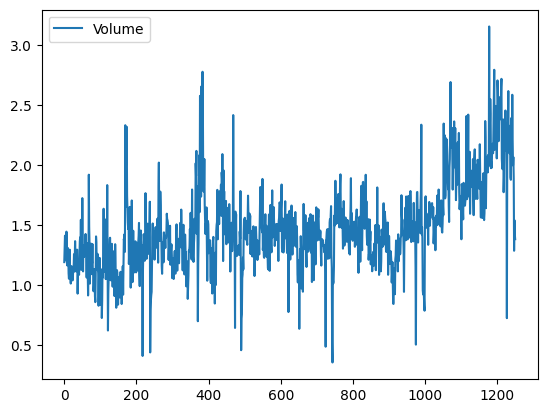

In [6]:
df.plot(y = 'Volume');

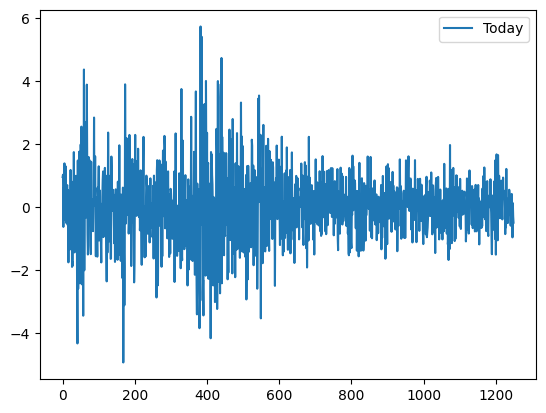

In [7]:
df.plot(y='Today');

In [22]:
vars = df.columns.drop(['Today', 'Direction', 'Year'])
preds = MS(vars)
X = preds.fit_transform(df)
y = df.Direction == 'Up'
glm = sm.GLM(y,X, family = sm.families.Binomial())
results = glm.fit()
summarize(results)

,coef,std err,z,P>|z|
intercept,-0.1260,0.241,-0.523,0.601
Lag1,-0.0731,0.050,-1.457,0.145
Lag2,-0.0423,0.050,-0.845,0.398
Lag3,0.0111,0.050,0.222,0.824
Lag4,0.0094,0.050,0.187,0.851
Lag5,0.0103,0.050,0.208,0.835
Volume,0.1354,0.158,0.855,0.392


The P values are significant telling us that the null hypothesis is true and we cannot predict the results using past prices and volume as interpreted by logistic regression on the data


In [24]:
results.params

intercept   -0.126000
Lag1        -0.073074
Lag2        -0.042301
Lag3         0.011085
Lag4         0.009359
Lag5         0.010313
Volume       0.135441
dtype: float64

In [25]:
results.pvalues

intercept    0.600700
Lag1         0.145232
Lag2         0.398352
Lag3         0.824334
Lag4         0.851445
Lag5         0.834998
Volume       0.392404
dtype: float64

In [26]:
probs = results.predict()
probs[:10]

array([0.50708413, 0.48146788, 0.48113883, 0.51522236, 0.51078116,
       0.50695646, 0.49265087, 0.50922916, 0.51761353, 0.48883778])

In [27]:
labels = np.array(['Down']*1250)
labels[probs>0.5] = 'Up'

In [28]:
confusion_table(labels, df['Direction'])

Truth,Down,Up
Predicted,,
Down,145,141
Up,457,507


In [30]:
(507+145)/1250, np.mean(labels == df.Direction) #52% accuracy

(0.5216, 0.5216)

In [31]:
#this seems better than random guessing but this is the training error rate
#training error rate is usually an underestimate

Adding Testing data by using dividing our current data set into 2 subsets and training on the larger subset then testing it on the other subset


In [36]:
train = df.Year < 2005
df_train = df.loc[train]
df_test = df.loc[~train]
df_train.shape


(998, 9)

In [109]:
X_train, X_test = X.loc[train] , X.loc[~train]
y_train, y_test = y.loc[train] , y.loc[~train]
glm_train = sm.GLM(y_train, X_train, family = sm.families.Binomial())
results = glm_train.fit()
summarize(results)

,coef,std err,z,P>|z|
intercept,0.1912,0.334,0.573,0.567
Lag1,-0.0542,0.052,-1.046,0.295
Lag2,-0.0458,0.052,-0.884,0.377
Lag3,0.0072,0.052,0.139,0.889
Lag4,0.0064,0.052,0.125,0.901
Lag5,-0.0042,0.051,-0.083,0.934
Volume,-0.1163,0.240,-0.485,0.628


In [110]:
probs = results.predict(exog = X_test)

In [111]:
D =df['Direction']
dir = D.loc[~train]
tdir = D.loc[train]
labels = np.array(['Down']*252)
labels[probs > 0.5] = 'Up'
confusion_table(labels, D.loc[~train])

Truth,Down,Up
Predicted,,
Down,77,97
Up,34,44


In [112]:
mr = np.mean(labels == dir)
mr , np.mean(labels != dir)

(0.4801587301587302, 0.5198412698412699)

In [ ]:
#Now this is not better than random guessing ):

removing the predictors that had high p_value as the they increase variance without reducing the bias

In [45]:
model = MS(['Lag1','Lag2']).fit(df)
x = model.transform(df)
x_train, x_test = x.loc[train] , x.loc[~train]
glm_train = sm.GLM(y_train,
                   x_train, family = sm.families.Binomial())
results = glm_train.fit()
summarize(results)

,coef,std err,z,P>|z|
intercept,0.0322,0.063,0.508,0.611
Lag1,-0.0556,0.052,-1.076,0.282
Lag2,-0.0445,0.052,-0.861,0.389


In [50]:
probs = results.predict(exog = x_test)
labels = np.array(['Down']*252)
labels[probs >0.5] = 'Up'
confusion_table(labels,dir)

Truth,Down,Up
Predicted,,
Down,35,35
Up,76,106


In [96]:
lr = np.mean(labels == dir)
lr , np.mean(labels != dir)

(0.5595238095238095, 0.44047619047619047)

In [51]:
#if it said up then how many times does it go up? (precision)
106/(106+76)

0.5824175824175825

this is better than 50% random guessing, one strategy could be to buy when our code tells so, as it has 58% chance to go up and do nothing when it says down

In [52]:
#LDA LINEAR DISCRIMINANT ANALYSIS

In [53]:
lda = LDA(store_covariance=True)

In [58]:
X_train, X_test = [M.drop(columns = ['intercept'])for M in [x_train, x_test]]

lda.fit(X_train, tdir)

LinearDiscriminantAnalysis(store_covariance=True)

In [55]:
lda.means_


array([[ 0.04279022,  0.03389409],
       [-0.03954635, -0.03132544]])

In [59]:
lda.classes_


array(['Down', 'Up'], dtype='<U4')

In [60]:
lda.priors_


array([0.49198397, 0.50801603])

In [61]:
lda.scalings_

array([[-0.64201904],
       [-0.51352928]])

In [62]:
lda_pred = lda.predict(X_test)

In [63]:
confusion_table(lda_pred, dir)

Truth,Down,Up
Predicted,,
Down,35,35
Up,76,106


In [95]:
lda = np.mean(lda_pred == dir)
lda

0.5595238095238095

In [65]:
#QDA Quadratic Discriminant Analysis

In [74]:
qda = QDA(store_covariance=True)
qda.fit(X_train, tdir)

QuadraticDiscriminantAnalysis(store_covariance=True)

In [75]:
qda.means_, qda.priors_

(array([[ 0.04279022,  0.03389409],
        [-0.03954635, -0.03132544]]),
 array([0.49198397, 0.50801603]))

In [76]:
qda.covariance_

[array([[ 1.50662277, -0.03924806],
        [-0.03924806,  1.53559498]]),
 array([[ 1.51700576, -0.02787349],
        [-0.02787349,  1.49026815]])]

In [77]:
qda_pred = qda.predict(X_test)
confusion_table(qda_pred, dir)

Truth,Down,Up
Predicted,,
Down,30,20
Up,81,121


In [94]:
qda = np.mean(qda_pred == dir)
qda

0.5992063492063492

In [ ]:
#Naive Bayes

In [79]:
NB = GaussianNB()
NB.fit(X_train, tdir)

GaussianNB()

In [82]:
NB.classes_, NB.class_prior_, NB.theta_, NB.var_

(array(['Down', 'Up'], dtype='<U4'),
 array([0.49198397, 0.50801603]),
 array([[ 0.04279022,  0.03389409],
        [-0.03954635, -0.03132544]]),
 array([[1.50355429, 1.53246749],
        [1.51401364, 1.48732877]]))

In [83]:
nb_labels = NB.predict(X_test)
confusion_table(nb_labels, dir)

Truth,Down,Up
Predicted,,
Down,29,20
Up,82,121


In [93]:
nb = np.mean(nb_labels == dir)
nb

0.5952380952380952

In [92]:
knn1 = KNeighborsClassifier(n_neighbors=1)
knn1.fit(X_train, tdir)
knn1_pred = knn1.predict(X_test)
confusion_table(knn1_pred, dir)
#very flexible so high varaince error
KNN1 = np.mean(knn1_pred == dir)
KNN1

0.5

In [91]:
#for k==3
knn3 = KNeighborsClassifier(n_neighbors=3)
knn3_pred = knn3.fit(X_train, tdir).predict(X_test)
KNN3 = np.mean(knn3_pred == dir)
KNN3

0.5317460317460317

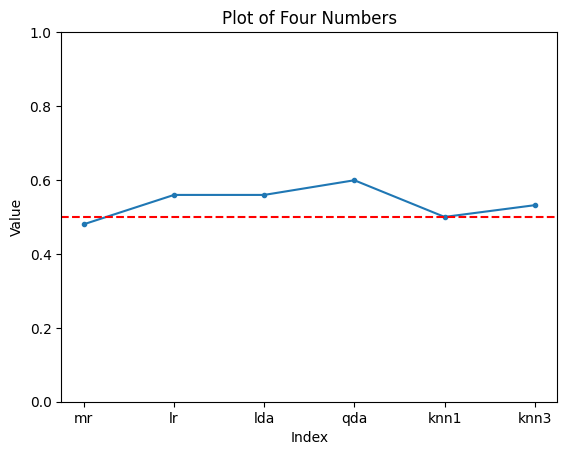

In [113]:
import matplotlib.pyplot as plt

numbers = [mr, lr, lda, qda, KNN1, KNN3]
string_list = [str(x) for x in numbers]
plt.plot(["mr", "lr", 'lda', 'qda', 'knn1','knn3'], numbers, marker = '.', linestyle = '-')
plt.axhline(y=0.5, color='r', linestyle='--', label='Random Guessing')
plt.xlabel('Index')
plt.ylabel('Value')
plt.ylim(0,1)
plt.title('Plot of Four Numbers')
plt.show()


In [114]:
#We can conclude for the given problem QDA performs the Best amongst all of our methods